# Q)Random Forest :> Fraud check

In [1]:
conda install pydot

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_3          23 KB
    ------------------------------------------------------------
                                           Total:          23 KB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/noarch::pydotplus-2.0.2-py_3 None




pydotplus-2.0.2      | 23 KB     |            |   0% 
pydotplus-2.0.2      | 23 KB     | ######8    |  68% 
pydotplus-2.0.2      | 23 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated package

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

# Collection of data and description

In [9]:
f_data=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\DATA SCIENCE\\Datasets\\Fraud_check.csv')
f_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
f_data.shape

(600, 6)

In [12]:
f_data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

# Creating dummy variables

In [13]:
ff=pd.get_dummies(f_data,columns=['Undergrad','Marital.Status','Urban'])

In [14]:
ff.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [15]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [16]:
corr = ff.corr()

<AxesSubplot:>

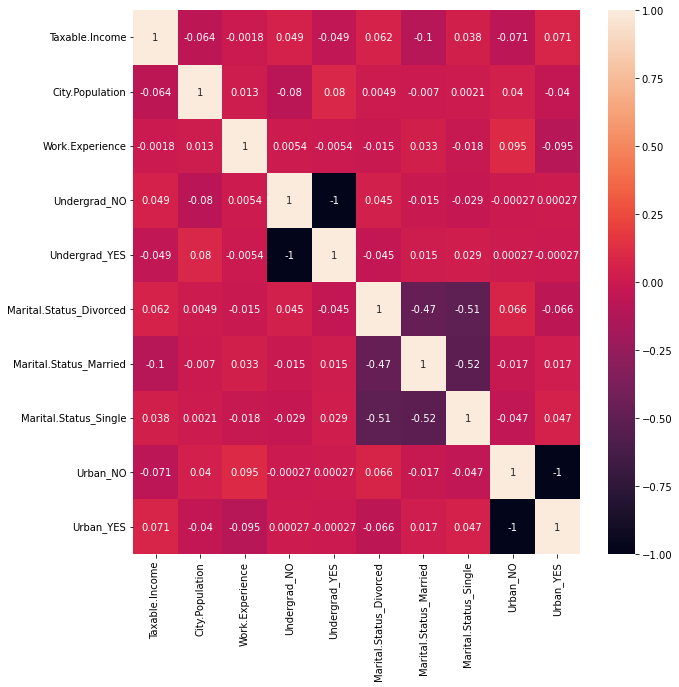

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Random Forest Model
Since the target variable is continious, so we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [18]:
ff['Taxable.Income']=pd.cut(ff['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [19]:
list(ff.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [20]:
X = ff.iloc[:,1:10]
y = ff.iloc[:,0]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [22]:
y_train.value_counts()

good     381
risky     99
Name: Taxable.Income, dtype: int64

In [23]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7354166666666667

In [24]:
pred_train = model.predict(x_train)

In [25]:
accuracy_score(y_train,pred_train)

1.0

In [26]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [27]:
pred_test = model.predict(x_test)

In [28]:
accuracy_score(y_test,pred_test)

0.775

In [29]:
confusion_matrix(y_test,pred_test)

array([[93,  2],
       [25,  0]], dtype=int64)

In [30]:
ff_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [31]:
ff_t

,Actual,Predicted
562,good,good
220,good,risky
547,good,good
313,good,good
246,good,good
...,...,...
454,good,good
599,good,good
223,good,good
120,good,good


In [33]:
cols = list(ff.columns)

In [34]:
predictors = cols[1:10]
target = cols[0]

In [35]:
tree1 = model.estimators_[20]

In [36]:
dot_data = StringIO()

In [39]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision=3)

In [40]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [42]:
graph.write_png('fraud_full.png')

True

# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 74%

In [43]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [44]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [45]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [46]:
graph.write_png('fraud_small.png')

True

In [53]:
img = mpimg.imread('C:\\Users\\DELL\\fraud_small.png')

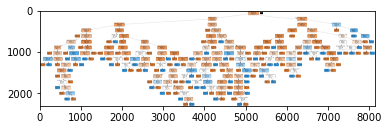

In [55]:
plt.imshow(img)

In [56]:
model.feature_importances_

array([0.52463586, 0.35359187, 0.01770842, 0.01730751, 0.01846072,
       0.01671717, 0.0173611 , 0.01812635, 0.016091  ])

In [59]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [60]:
fi

,feature,importance
0,City.Population,0.524636
1,Work.Experience,0.353592
4,Marital.Status_Divorced,0.018461
7,Urban_NO,0.018126
2,Undergrad_NO,0.017708
6,Marital.Status_Single,0.017361
3,Undergrad_YES,0.017308
5,Marital.Status_Married,0.016717
8,Urban_YES,0.016091


# As seen in the above table city population is most important feature

# 